# Exploratory Micro-Array Stuff from August

## Plotted All Gene Max Expression Angles on a circle

## tried a z-score approach - will not do in the future

In [110]:
import pandas as pd
import csv
import scipy.stats
test_df = pd.read_table("nestorawa_forcellcycle_expressionMatrix.txt.gz", compression='gzip', index_col = 0)
tenX_gene_names = test_df.index.values
whitfield_df = pd.read_csv("Whitfield_2013_cell_cycle_2830_all_scores.csv")

In [15]:
tenX_genes = tenX_gene_names.tolist()

In [188]:
row_counter = 0
found_counter = 0
cell_cycle_2830_scores_list = list()
use_scores_list = list()
all_genes_to_scores = dict()
use_genes_to_scores = dict()
for index, row in whitfield_df.iterrows():
    name = str(row['NAME'])
    if (name != 'nan'):
        #print("___" + name + "___")
        names = name.split("^")
        if (len(names) > 1):
            print("___" + names[1] + "___")
            gene_name = names[1].strip()
            if (gene_name in tenX_genes):
                found_counter += 1
                if (found_counter < 500):
                    use_scores_list.append((row['Cos'], row['Sin']))
                    use_genes_to_scores[gene_name] = (row['Cos'], row['Sin'])
            all_genes_to_scores[gene_name] = (row['Cos'], row['Sin'])
            cell_cycle_2830_scores_list.append((row['Cos'], row['Sin']))
            print(str(row_counter) + " " + str(found_counter))
    row_counter += 1

___ LOC152573 ___
0 0
___ C15orf20 ___
1 0
___ ARL6IP ___
2 0
___ KIF20A ___
3 1
___ HSPA1A ___
4 2
___ CANP ___
5 2
___ PLK1 ___
6 3
___ MYB ___
7 4
___ C20orf129 ___
8 4
___ FLJ22624 ___
9 4
___ CCNB1 ___
10 5
___ CCNE2 ___
11 6
___ FLJ10156 ___
12 6
___ CDCA8 ___
13 7
___ C20orf55 ___
14 7
___ STK6 ___
15 7
___ ARL6IP ___
16 7
___ SGOL2 ___
17 7
___ ASPM ___
18 8
___ DDA3 ___
19 8
___ TROAP ___
20 9
___  ___
21 9
___ CENPE ___
22 10
___ BUB1 ___
23 11
___ HIST1H4C ___
24 12
___ E2F2 ___
25 13
___ CDCA2 ___
26 14
___ PLK1 ___
27 15
___ HIST1H4L ___
28 15
___ HIST1H1A ___
29 16
___ NEK2 ___
30 17
___ ARHGAP11A ___
31 18
___ HSPA1A ___
32 19
___ TOP2A ___
33 20
___ HIST1H4B ___
34 21
___ KPNA2 ___
35 22
___ C20orf55 ___
36 22
___ CDO1 ___
37 23
___ C15orf20 ___
38 23
___  ___
39 23
___  ___
40 23
___ C15orf23 ___
41 23
___ STARD8 ___
42 24
___ DLG7 ___
43 24
___  ___
44 24
___  ___
45 24
___  ___
46 24
___ TTK ___
47 25
___ HIST1H4D ___
48 26
___ KIF23 ___
49 27
___  ___
50 27
___ GPSM

In [187]:
print(found_counter)

1297


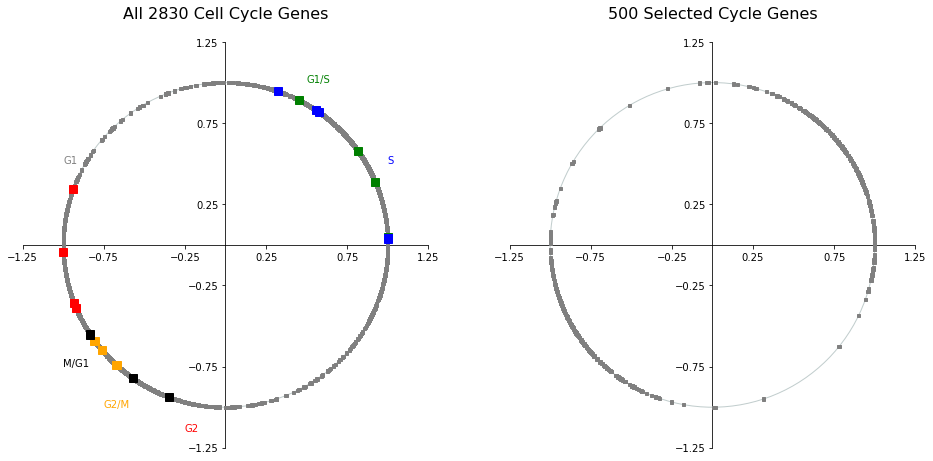

In [189]:
from pylab import *
figure(figsize=(16,8))
ax=subplot(121, aspect='equal')

#### All Genes

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))
ax.yaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))

#plot one circle (the biggest one on bottom-right)
# now make a circle with no fill, which is good for hi-lighting key results
circle = Circle((0, 0), 1.0, color='#C1CDCD', fill=False)
ax.add_artist(circle)
#circles(1, 0, 0.5, 'r', alpha=0.2, lw=5, edgecolor='b', transform=ax.transAxes)

#plot a set of circles (circles in diagonal)
#a=arange(11)
#out = circles(a, a, a*0.2, c=a, alpha=0.5, edgecolor='none')

# Create a Rectangle patches
for gene in cell_cycle_2830_scores_list:
    rect = Rectangle((gene[0]-0.01,gene[1]-0.01),0.02,0.02,linewidth=1,edgecolor='gray',facecolor='gray',zorder=9)
    # Add the patch to the Axes
    ax.add_patch(rect)
    
# G1/S
for gene in all_genes_to_scores:
    if (gene in ("CCNE1", "E2F1", "CDC6", "PCNA")):
        rect = Rectangle((all_genes_to_scores[gene][0]-0.025,all_genes_to_scores[gene][1]-0.025),0.05,0.05,linewidth=1,edgecolor='green',facecolor='green',zorder=10)
        # Add the patch to the Axes
        ax.add_patch(rect)
    elif (gene in ("RFC4", "DHFR", "RRM2", "RAD51")):
        rect = Rectangle((all_genes_to_scores[gene][0]-0.025,all_genes_to_scores[gene][1]-0.025),0.05,0.05,linewidth=1,edgecolor='blue',facecolor='blue',zorder=10)
        # Add the patch to the Axes
        ax.add_patch(rect)
    elif (gene in ("CDC2", "TOP2A", "CCNF", "CCNA2")):
        rect = Rectangle((all_genes_to_scores[gene][0]-0.025,all_genes_to_scores[gene][1]-0.025),0.05,0.05,linewidth=1,edgecolor='red',facecolor='red',zorder=10)
        # Add the patch to the Axes
        ax.add_patch(rect)
    elif (gene in ("BUB1", "CCNB1", "PLK1")):
        rect = Rectangle((all_genes_to_scores[gene][0]-0.025,all_genes_to_scores[gene][1]-0.025),0.05,0.05,linewidth=1,edgecolor='orange',facecolor='orange',zorder=10)
        # Add the patch to the Axes
        ax.add_patch(rect)
    elif (gene in ("PTTG1", "RAD21", "CDKN3")):
        rect = Rectangle((all_genes_to_scores[gene][0]-0.025,all_genes_to_scores[gene][1]-0.025),0.05,0.05,linewidth=1,edgecolor='black',facecolor='black',zorder=10)
        # Add the patch to the Axes
        ax.add_patch(rect)

text(0.5, 1, "G1/S", color='green')
text(1, 0.5, "S", color='blue')
text(-0.25, -1.15, "G2", color='red')
text(-0.75, -1, "G2/M", color='orange')
text(-1, -0.75, "M/G1", color='black')
text(-1, 0.5, "G1", color='gray')

title("All 2830 Cell Cycle Genes\n", fontsize=16)

############
# Used genes
# 
ax=subplot(122, aspect='equal')

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.xaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))
ax.yaxis.set_ticks(np.arange(-1.25, 1.5, 0.5))

#plot one circle (the biggest one on bottom-right)
# now make a circle with no fill, which is good for hi-lighting key results
circle = Circle((0, 0), 1.0, color='#C1CDCD', fill=False)
ax.add_artist(circle)

for gene in use_scores_list:
    rect = Rectangle((gene[0]-0.01,gene[1]-0.01),0.02,0.02,linewidth=1,edgecolor='gray',facecolor='gray',zorder=9)
    # Add the patch to the Axes
    ax.add_patch(rect)

title("500 Selected Cycle Genes\n", fontsize=16)

xlim(-1.25,1.25)
ylim(-1.25, 1.25)

show()

In [169]:
print(all_genes_to_scores["E2F1"])

(0.892232492, 0.451576329)


In [146]:
# normalize, scale, ln, and convert to z-score
from scipy import stats
col_sums = test_df.sum(axis=0) # axis 0 is along the index
normalized_df = test_df.div(col_sums)
scaled_df = normalized_df.multiply(10000)
log_df = np.log1p(scaled_df)
z_arr = stats.zscore(log_df, axis=1)
z_df = pd.DataFrame(z_arr, index = log_df.index, columns = log_df.columns)

/home/moamin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2246: RuntimeWarning: invalid value encountered in true_divide
  np.expand_dims(sstd, axis=axis))


In [184]:
# these are > 2 std genes - see if any of them belong in our set, and where....
for colname in z_df.columns:
    print(colname)
    count = 0
    count_our = 0
    for index, row in z_df.iterrows():
        if (row[colname] > 2):
            if (index in use_genes_to_scores):
                count += 1
    print(count) 

Prog_013
10
Prog_019
21
Prog_031
23
Prog_037
31
Prog_008
15
Prog_014
3
Prog_020
9
Prog_026
13
Prog_032
4
Prog_038
9
Prog_002
15
Prog_009
7
Prog_015
16
Prog_021
21
Prog_027
18
Prog_033
17
Prog_039
4
Prog_003
19
Prog_010
32
Prog_016
9
Prog_022
4
Prog_028
10
Prog_040
19
Prog_004
21
Prog_017
13
Prog_023
17
Prog_029
36
Prog_035
8
Prog_012
34
Prog_018
18
Prog_024
15
Prog_030
12
Prog_036
26
Prog_042
12
Prog_006
21
Prog_049
7
Prog_055
11
Prog_061
21
Prog_067
10
Prog_073
16
Prog_079
13
Prog_043
10
Prog_050
12
Prog_056
15
Prog_062
29
Prog_068
20
Prog_074
18
Prog_044
18
Prog_051
11
Prog_057
19
Prog_069
40
Prog_075
21
Prog_081
8
Prog_045
20
Prog_052
15
Prog_058
11
Prog_064
4
Prog_070
16
Prog_076
13
Prog_082
13
Prog_046
12
Prog_053
12
Prog_059
14
Prog_065
7
Prog_071
12
Prog_077
42
Prog_083
19
Prog_047
14
Prog_060
42
Prog_066
13
Prog_072
16
Prog_084
12
Prog_048
21
Prog_091
2
Prog_097
11
Prog_103
17
Prog_109
29
Prog_115
11
Prog_085
19
Prog_092
17
Prog_098
14
Prog_110
13
Prog_116
17
Prog_122
25
Prog_0

In [158]:
# RFC4 0.816017535,0.578027147
# CNNCA2 -0.358221992,-0.933636441
#For instance, in the unit circle, for any angle θ, the trig values for sine and cosine are clearly nothing more than sin(θ) = y and cos(θ) = x.


               Prog_013  Prog_019  Prog_031  Prog_037  Prog_008  Prog_014  \
GNAI3          0.541395 -0.386948 -1.254304 -1.232986 -1.196397 -0.779373   
PBSN          -0.080381 -0.080381 -0.080381 -0.080381 -0.080381 -0.080381   
CDC45         -0.902481 -0.804991 -0.909821 -0.924185  2.701953  0.189837   
H19            1.404347 -0.188072 -0.188072 -0.188072 -0.188072 -0.188072   
SCML2         -0.305196 -0.305196 -0.305196 -0.305196 -0.305196  0.010224   
APOH          -0.046039 -0.046039 -0.046039 -0.046039 -0.046039 -0.046039   
NARF          -0.781798  0.754419 -0.788776 -0.207860  0.325875  0.558263   
CAV2          -0.158738 -0.158738 -0.158738 -0.158738 -0.141666 -0.131653   
KLF6          -0.311284  2.126794 -0.566122 -0.455672 -0.589769 -0.497592   
SCMH1          1.956419 -0.440986 -0.481374  1.031478  0.450972 -0.529540   
COX5A         -0.654240  0.969778 -1.639217 -2.347932  0.512470  1.239230   
TBX2          -0.112677 -0.112677  0.450021 -0.112677 -0.112677 -0.112677   

In [186]:
import math
math.atan2(-0.609065103,-0.793120231) # angle from sine over the cosine

-2.486711355362078

In [ ]:
# Get tpm values data
# tissue data sources
#gtex paper: cite? https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4010069/
# tissues cite - tpm for all tissues, median per sample
# https://gtexportal.org/home/datasets
# GTEx_Analysis_2016-01-15_v7_RNASeQCv1.1.8_gene_median_tpm.gct.gz
# get brain?